# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: 

Дата выдачи: <span style="color:red">__13 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__28 февраля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

In [1]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

__Ваше решение:__

$$y_i = \gamma\tilde{y_i} + \delta$$
$$\nabla_\gamma\mathcal{L} = \sum\frac{\partial{\mathcal{L}}}{\partial{y_i}}\frac{\partial{y_i}}{\partial\gamma} = \nabla_{y} \mathcal{L}*\tilde{y_i}$$
$$\nabla_\delta\mathcal{L} = \sum\frac{\partial{\mathcal{L}}}{\partial{y_i}}\frac{\partial{y_i}}{\partial\delta} = \nabla_{y} \mathcal{L}*1 = \nabla_{y} \mathcal{L}$$
$$\frac{\partial{\mathcal{L}}}{\partial{x_i}} = \frac{\partial{\mathcal{L}}}{\partial{\tilde{y_i}}}*\frac{\partial{\tilde{y_i}}}{\partial{x_i}} + \frac{\partial{\mathcal{L}}}{\partial{\mu}}*\frac{\partial{\mu}}{\partial{x_i}} + \frac{\partial{\mathcal{L}}}{\sigma^2}*\frac{\partial{\sigma^2}}{\partial{x_i}}$$
$$\frac{\partial{\mathcal{L}}}{\partial{\tilde{y_i}}} = \gamma*\nabla_{y_i}\mathcal{L}$$
$$\frac{\partial{\tilde{y_i}}}{\partial{x_i}} = \frac{1}{\sqrt{\sigma^2 + \epsilon}}$$
$$\frac{\partial{\mu}}{\partial{x_i}} = \frac{1}{n}$$
$$\frac{\partial{\sigma^2}}{\partial{x_i}} = \frac{2(x_i - \mu)}{n}$$

$$\nabla_{x_i}\mathcal{L} = \nabla$$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__


Вот вывод инициализации для функции активации **ReLU** аналогичным способом:  

### **Вывод инициализации весов для ReLU**  

#### **1. Прямой проход**  
Рассмотрим линейное преобразование перед активацией:  
$$
y^l = W^l x^l + b^l
$$  
Поскольку $ b^l = 0 $, имеем:  
$$
y^l = W^l x^l.
$$  
Пусть все компоненты входа слоя $ x^l $ имеют нулевое среднее и одинаковую дисперсию $ \mathbb{D} x^l = \sigma_x^2 $. Тогда  
$$
\mathbb{E} y^l_i = \sum_{j=1}^{n_l} \mathbb{E} W^l_{ij} \mathbb{E} x^l_j = 0.
$$  
Дисперсия выхода:  
$$
\mathbb{D} y^l = \sum_{j=1}^{n_l} \mathbb{D} W^l_{ij} \mathbb{D} x^l_j = n_l \mathbb{D} W^l \mathbb{D} x^l.
$$  

Теперь применим ReLU:  
$$
x^{l+1} = g(y^l) = \max(0, y^l).
$$  
ReLU зануляет половину значений  $y^l$, поэтому после активации:  
$$
\mathbb{D} x^{l+1} = \frac{1}{2} \mathbb{D} y^l = \frac{1}{2} n_l \mathbb{D} W^l \mathbb{D} x^l.
$$  
Чтобы дисперсия не изменялась на каждом слое:  
$$
\mathbb{D} x^{l+1} = \mathbb{D} x^l.
$$  
Тогда получаем условие:  
$$
\frac{1}{2} n_l \mathbb{D} W^l = 1.
$$  
Следовательно, для нормального распределения:  
$$
\mathbb{D} W^l = \frac{2}{n_l}.
$$  

#### **2. Обратный проход**  
Градиент потерь через слой передается как:  
$$
\frac{\partial L}{\partial x^l} = W^{lT} \frac{\partial L}{\partial y^l}.
$$  
Снова учитываем ReLU:  
$$
\frac{\partial L}{\partial y^l} = \frac{\partial L}{\partial x^{l+1}} \cdot \mathbb{1}(y^l > 0).
$$  
Так как половина значений зануляется, получаем аналогичное условие для дисперсии градиентов:  
$$
\mathbb{D} W^l = \frac{2}{n_{l+1}}.
$$  

#### **3. Итоговая инициализация (Kaiming He)**  
Среднее гармоническое значений $ \mathbb{D} W^l $:  
$$
\mathbb{D} W^l = \frac{2}{n_l}.
$$  
Для равномерного распределения:  
$$
W^l_{ij} \sim \mathcal{U} \left[-\sqrt{\frac{6}{n_l}}, \sqrt{\frac{6}{n_l}}\right].
$$  
Для нормального распределения:  
$$
W^l_{ij} \sim \mathcal{N} \left(0, \frac{2}{n_l}\right).
$$  

Эта инициализация называется **Kaiming He initialization** и лучше всего подходит для ReLU.

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

1. Сигмоида считается с помощью ряда Тейлора, поэтому при большом числе слоев вычислительная сложность очень сильно возрастает, чего нет у ReLU. 
2. У сигмоиды сильная проблема исчезающего градиента. ReLU, напротив, имеет производную 1 для положительных значений и 0 для отрицательных, что помогает избежать исчезающего градиента в большинстве случаев.

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
class IdentityLayer:
  """
  A building block. Each layer is capable of performing two things:

  - Process input to get output:           
  output = layer.forward(input)

  - Propagate gradients through itself:    
  grad_input = layer.backward(input, grad_output)

  Some layers also have learnable parameters.

  Modified code from cs.hse DL course *
  """
  def __init__(self, input_n, output_n):
      """
      Here you can initialize layer parameters (if any) 
      and auxiliary stuff. You should enumerate all parameters
      in self.params
      """
      # my code
      self.params = []

  def forward(self, input):
      """
      Takes input data of shape [batch, input_units], 
      returns output data [batch, output_units]
      """
      # An identity layer just returns whatever it gets as input.
      # my code
      self.input = input  # Сохраняем вход для backward
      return input

  def backward(self, grad_output): 
      """
      Performs a backpropagation step through the layer, 
      with respect to the given input.

      To compute loss gradients w.r.t input, 
      you need to apply chain rule (backprop):

      d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

      Luckily, you already receive d `loss` / d `layer` in argument, 
      so you only need to multiply it by d `layer` / d `input`.

      NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
      So it's better to write down the `loss` differential and extract
      d `layer` / d `input` from it so that only 2D tensors were present.

      The method returns:
      * gradient w.r.t input (will be passed to 
        previous layer's backward method)
      * flattened gradient w.r.t. parameters (with .ravel() 
        applied to each gradient). 
        If there are no params, return []
      """
      # Градиент слоя идентификации — это именно grad_output
      input_dim = self.input.shape[1] # размерность входного пространства

      d_layer_d_input = np.eye(input_dim)   # тк f(x) = x, то производная d_y_d_x будет = 1 

      return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        ### my_code 
        self.input = input
        return np.maximum(0, input)
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        grad_input = grad_output * (self.input > 0)
        return grad_input, [] # grad_input - производная РеЛУ, [] - список для обучаемых параметров. Если бы у слоя были параметры (например, веса W и смещения b в линейном слое), здесь бы возвращались их градиенты.
    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [4]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [5]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        ### your code here
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        ### your code here
        grad_x = np.dot(grad_output, self.weights.T) 
        grad_w = np.dot(self.input.T, grad_output)
        grad_b = np.sum(grad_output, axis=0)
        # grad_b = grad_b.reshape(1, -1)
        # grad_params = np.r_[grad_w, grad_b]
        grad_params = np.concatenate([grad_w.ravel(), grad_b.ravel()])

        return grad_x, grad_params
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [6]:
def eval_numerical_gradient(f, x, verbose=False, h=1e-5):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    """
    fx = f(x)  # Evaluate function at original point
    grad = np.zeros_like(x)

    # Iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        oldval = x[ix]

        # Compute f(x+h)
        x[ix] = oldval + h
        fxph = f(x)
        x[ix] = oldval - h
        fxmh = f(x)
        x[ix] = oldval  # Restore original value

        # Compute the partial derivative
        if np.isscalar(fxph):  
            grad[ix] = (fxph - fxmh) / (2 * h)
        else:
            grad[ix] = (fxph[ix] - fxmh[ix]) / (2 * h)

        if verbose:
            print(ix, grad[ix])  # Print the current index and gradient value

        it.iternext()  # Step to next dimension

    return grad


Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

...

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [7]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
output = relu.forward(points)   # Считаем выходные значения
grad_output = np.ones_like(output) 

grads, _ = relu.backward(grad_output)
numeric_grads = eval_numerical_gradient(lambda x: relu.forward(x), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

...

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [8]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
output = linear.forward(points)   # Считаем выходные значения
grad_output = np.ones_like(output) 

grads, _ = linear.backward(grad_output)

numeric_grads = eval_numerical_gradient(lambda x: np.sum(linear.forward(x)), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [9]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [10]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        # log(a/b) = log(a) - log(b) 
        log_sum_exp = logsumexp(input, axis=1, keepdims=True)  # [batch, 1]
        self.log_softmax = input - log_sum_exp  # [batch, num_units]

        return self.log_softmax
        
    def backward(self, grad_output):
        """
        Propagates gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        softmax = np.exp(self.log_softmax)  # экспонента от логарифма от log_softmax
        grad_input = grad_output - softmax * np.sum(grad_output, axis=1, keepdims=True)  # производная от LogSoftmax
        return grad_input, []
    
    def __repr__(self):
        return 'LogSoftmax()'


Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [11]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    ### your code here ???
    batch_size = activations.shape[0]
    
    # Берем log-prob только для истинных классов target
    loss = -np.mean(activations[np.arange(batch_size), target])
    
    return loss


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    ### your code here ???
    batch_size, num_classes = activations.shape

    # Восстанавливаем softmax из log-softmax
    softmax = np.exp(activations)
    softmax /= np.sum(softmax, axis=1, keepdims=True)

    # Создаем one-hot вектор для правильных классов
    one_hot = np.zeros_like(activations)
    one_hot[np.arange(batch_size), target] = 1

    # Градиент: softmax - one-hot, усредненный по батчу
    grad = (softmax - one_hot) / batch_size
    
    return grad


Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [12]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

# your code here
activations = lsm.forward(points)
grads_output = grad_NLL(activations, target)
grads, _ = lsm.backward(grads_output)

# Численный градиент
def loss_fn(x):
    return NLL(lsm.forward(x), target)

numeric_grads = eval_numerical_gradient(loss_fn, points) 

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.datasets import load_digits

In [15]:
X, y = load_digits(return_X_y=True)

In [16]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [20]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [21]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [22]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    ### your code here
    for layer in network:
        X = layer.forward(X)
    return X

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [23]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    ### your code here
    logits = forward(network, X)  # Получаем логарифмы вероятностей
    return np.argmax(logits, axis=1)  # Выбираем индекс с максимальным значением (предсказа

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [24]:
from scipy.optimize import minimize

In [25]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized.

            ``fun(x, *args) -> float``

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of

            - 'Nelder-Mead' :ref:`(see here) <optimize.mi

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [26]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [27]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    
    set_weights(weights, network)

    output = forward(network, X)

    loss = NLL(output, y)

    grad_output = grad_NLL(output, y)

    grad_params = []

    for layer in reversed(network):
        grad_output, grad_layer_params = layer.backward(grad_output)
        grad_params.append(grad_layer_params)

    grad = []
    for layer_grads in reversed(grad_params):
        for param_grad in layer_grads:
            grad += param_grad.ravel().tolist()
    
    return loss, np.array(grad)
    

Теперь мы готовы обучать нашу нейросеть. 

In [28]:
weights = get_weights(network)

In [29]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [30]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [31]:
res["nit"] # number of iterations (should be >> 10)

101

In [32]:
res["success"] # should be True

True

In [33]:
res["x"] # leraned weights

array([-0.00612059, -0.02239901, -0.01036261, ..., -0.86849562,
       -1.90880408, -0.18254938])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [58]:
### your code here
set_weights(res["x"], network)

y_pred_train = predict(network, X_train)
acc_train = np.mean(y_pred_train == y_train)

y_pred_test = predict(network, X_test)
acc_test = np.mean(y_pred_test == y_test)

print(f"Train_accuracy = {acc_train}, Test_accuracy = {acc_test}")

Train_accuracy = 1.0, Test_accuracy = 0.9488888888888889


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [159]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        ### your code here
        set_weights(weights, self.network)
        
        train_preds = predict(self.network, self.X_train)
        test_preds = predict(self.network, self.X_test)
        
        train_accuracy = np.mean(train_preds == self.y_train)
        test_accuracy = np.mean(test_preds == self.y_test)
        
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)
        
        if self.print:
            print(f"Train accuracy: {train_accuracy:.4f}, Test accuracy: {test_accuracy:.4f}")

In [68]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Train accuracy: 0.1062, Test accuracy: 0.0844
Train accuracy: 0.1388, Test accuracy: 0.0933
Train accuracy: 0.1559, Test accuracy: 0.1111
Train accuracy: 0.2071, Test accuracy: 0.2044
Train accuracy: 0.3267, Test accuracy: 0.3200
Train accuracy: 0.3393, Test accuracy: 0.3222
Train accuracy: 0.4217, Test accuracy: 0.3889
Train accuracy: 0.5152, Test accuracy: 0.5000
Train accuracy: 0.5241, Test accuracy: 0.4889
Train accuracy: 0.6073, Test accuracy: 0.5689
Train accuracy: 0.6860, Test accuracy: 0.6556
Train accuracy: 0.7179, Test accuracy: 0.6933
Train accuracy: 0.7164, Test accuracy: 0.7200
Train accuracy: 0.7372, Test accuracy: 0.7511
Train accuracy: 0.7506, Test accuracy: 0.7444
Train accuracy: 0.7832, Test accuracy: 0.7822
Train accuracy: 0.8129, Test accuracy: 0.8089
Train accuracy: 0.8448, Test accuracy: 0.8400
Train accuracy: 0.8619, Test accuracy: 0.8533
Train accuracy: 0.8738, Test accuracy: 0.8622
Train accuracy: 0.8731, Test accuracy: 0.8800
Train accuracy: 0.8909, Test accur

Изобразите на графике кривую качества на обучени и контроле по итерациям:

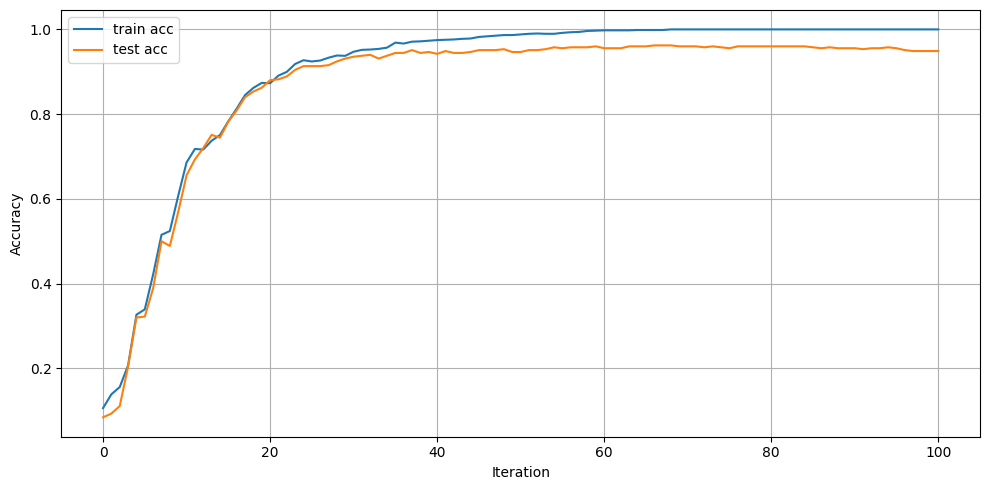

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [71]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [102]:
### your code here

def get_accuracy(X_train, X_test, y_train, y_test, n_layer):

    network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=n_layer, activation_class=ReLU)
        
    weights = get_weights(network)

    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True                          # says that gradient is computed in fun
    )
    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy


n_runs = 5
n_layers_runs = [1, 2, 3, 4, 5]

for i, n_layer in enumerate(n_layers_runs):
    for j in range(n_runs):
        train_acc, test_acc = get_accuracy(X_train, X_test, y_train, y_test, n_layer=n_layer)
        accs_train[i, j] = train_acc
        accs_test[i, j] = test_acc


In [ ]:
accs_test

array([[0.94666667, 0.94666667, 0.94444444, 0.94      , 0.94444444],
       [0.94      , 0.94888889, 0.95111111, 0.95555556, 0.96      ],
       [0.95555556, 0.95333333, 0.95555556, 0.94888889, 0.95111111],
       [0.95777778, 0.93777778, 0.95111111, 0.94      , 0.94888889],
       [0.93555556, 0.08444444, 0.96      , 0.08444444, 0.94888889]])

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

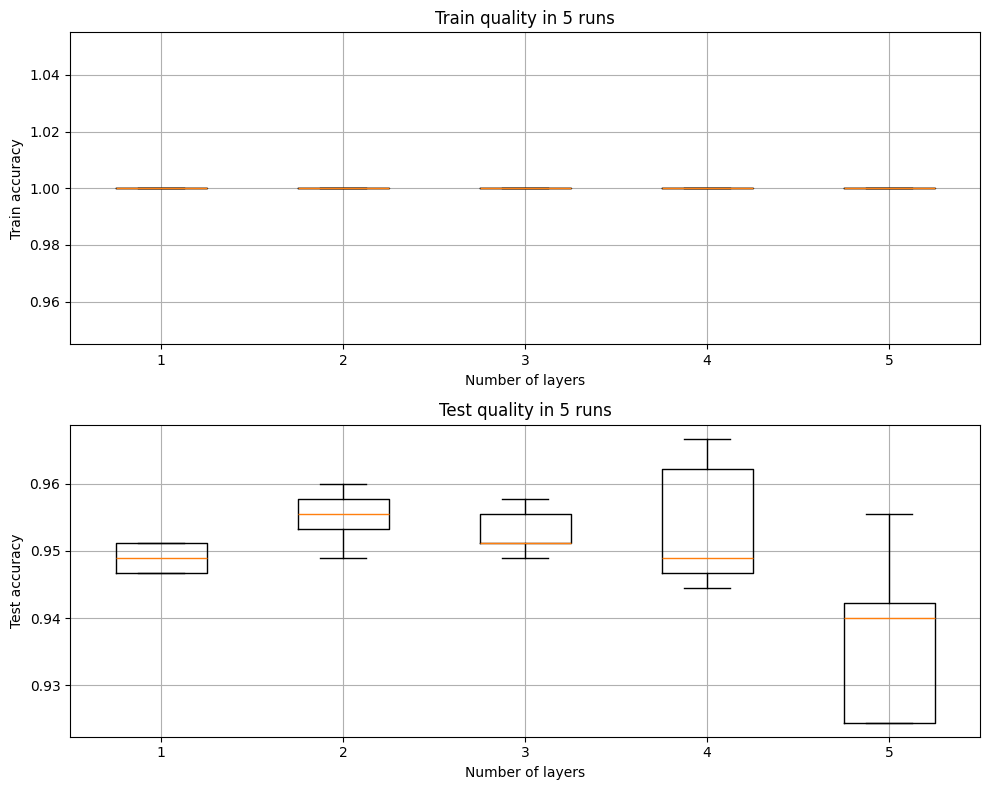

In [103]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

Видим, что боксплоты на обучающей выборке одинаковые, так как качество на обучении всегда равно 1. На валидационной выборке видим, что наименьший разброс у сети с 3 и 4 слоями. Нейросеть с малым числом слоев могла недообучиться, а с большим - переобучиться. В данном случае данные довольно простые, поэтому линейная модель справится не хуже, чем нелинейная, однако в случае сложных зависимостей нелинейная модель сможет точнее приблизить истинную зависимость.

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [89]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                std = np.sqrt(2.0 / input_units)
                layer.weights = np.random.randn(input_units, output_units) * std
                pass
            elif initialization == 'Xavier':
                std = np.sqrt(2.0 / (input_units + output_units))
                layer.weights = np.random.randn(input_units, output_units) * std
                pass
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [90]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [108]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [111]:
### your code here
def get_accuracy_layer3(X_train, X_test, y_train, y_test, initialization):
    network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=3, activation_class=ReLU)
    
    initialize_network(network, initialization)
    weights = get_weights(network)

    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True                          # says that gradient is computed in fun
    )
    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy


n_runs = 5

for i in range(n_runs):
    for j in range(n_runs):
        train_acc, test_acc = get_accuracy_layer3(X_train, X_test, y_train, y_test, init_vars[i])
        accs_train[i, j] = train_acc
        accs_test[i, j] = test_acc

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

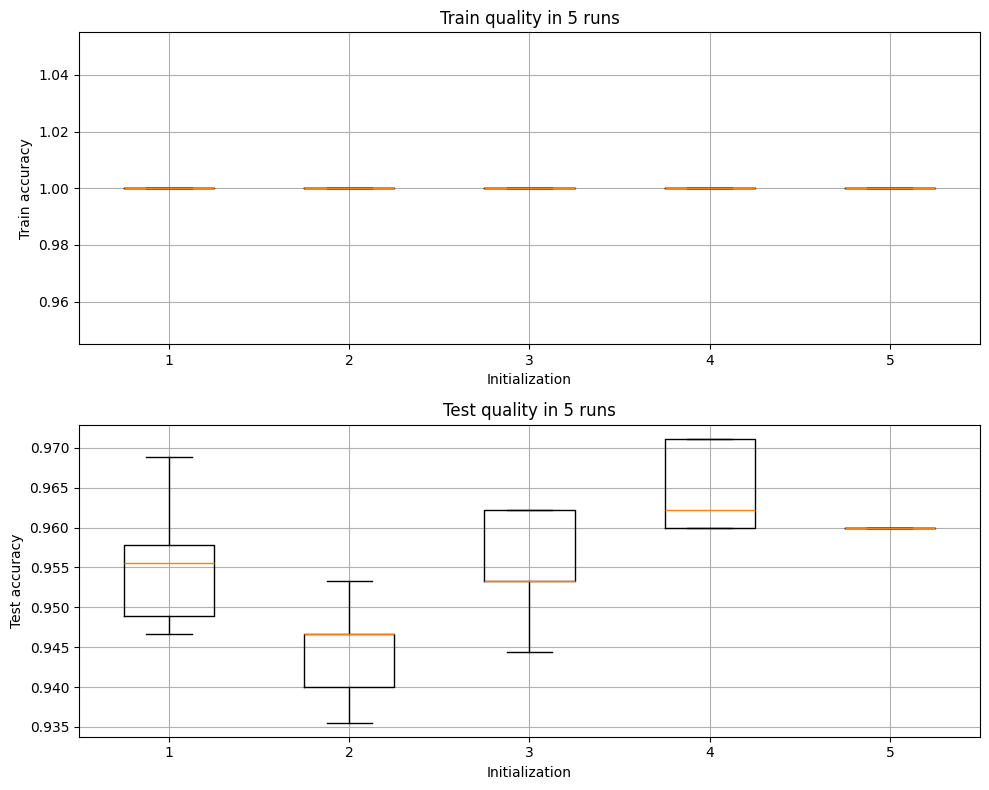

In [112]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [116]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [117]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [118]:
### your code here
def get_accuracy_layer4(X_train, X_test, y_train, y_test, initialization):
    network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=4, activation_class=ReLU)
    
    initialize_network(network, initialization)
    weights = get_weights(network)

    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True                          # says that gradient is computed in fun
    )
    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy


n_runs = 5

for i in range(n_runs):
    for j in range(n_runs):
        train_acc, test_acc = get_accuracy_layer4(X_train, X_test, y_train, y_test, init_vars[i])
        accs_train[i, j] = train_acc
        accs_test[i, j] = test_acc

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

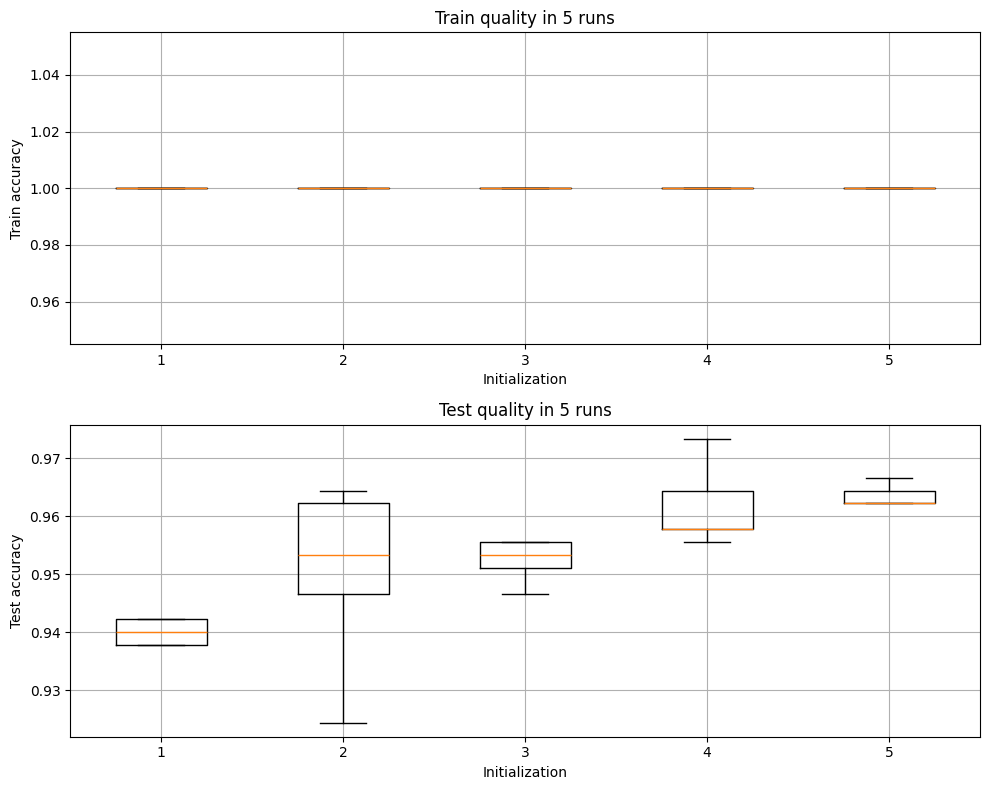

In [119]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [120]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [121]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [122]:
### your code here
def get_accuracy_layer5(X_train, X_test, y_train, y_test, initialization):
    network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=5, activation_class=ReLU)
    
    initialize_network(network, initialization)
    weights = get_weights(network)

    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True                          # says that gradient is computed in fun
    )
    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy


n_runs = 5

for i in range(n_runs):
    for j in range(n_runs):
        train_acc, test_acc = get_accuracy_layer5(X_train, X_test, y_train, y_test, init_vars[i])
        accs_train[i, j] = train_acc
        accs_test[i, j] = test_acc

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

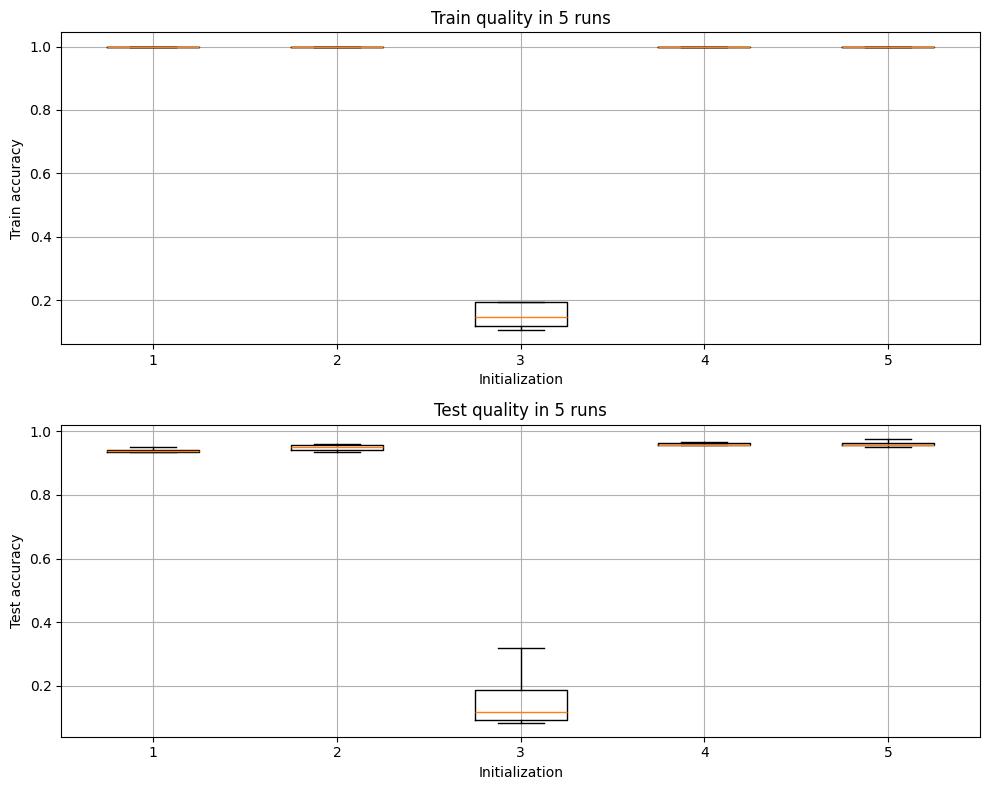

In [123]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[1].set_xlabel("Initialization")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

Видим, что самая устойчвая реализация - когда мы инициилизируем веса с помощью 'Kaiming'. Это логично, так как эта инициализация создана для функции активации ReLU, которую мы и используем. Если делаем начальную инициализацию с среднеквадратичным отклонением = 1, то в сети с числом слоев 5 можем наблюдать большую дисперсию. Лучше всего глубоекие сети помогают иницииализировать веса с распределением Xavier и Kaiming


Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [134]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [135]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [137]:
def get_accuracy_list(X_train, X_test, y_train, y_test, initialization):
    network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                           n_layers=4, activation_class=ReLU)
    
    initialize_network(network, initialization)
    weights = get_weights(network)

    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = minimize(
        compute_loss_grad, weights,  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    return cb.train_acc, cb.test_acc


for init_var in init_vars:
    train_acc, test_acc = get_accuracy_list(X_train, X_test, y_train, y_test, init_var)
    accs_train_on_iterations.append(train_acc)
    accs_test_on_iterations.append(test_acc) 



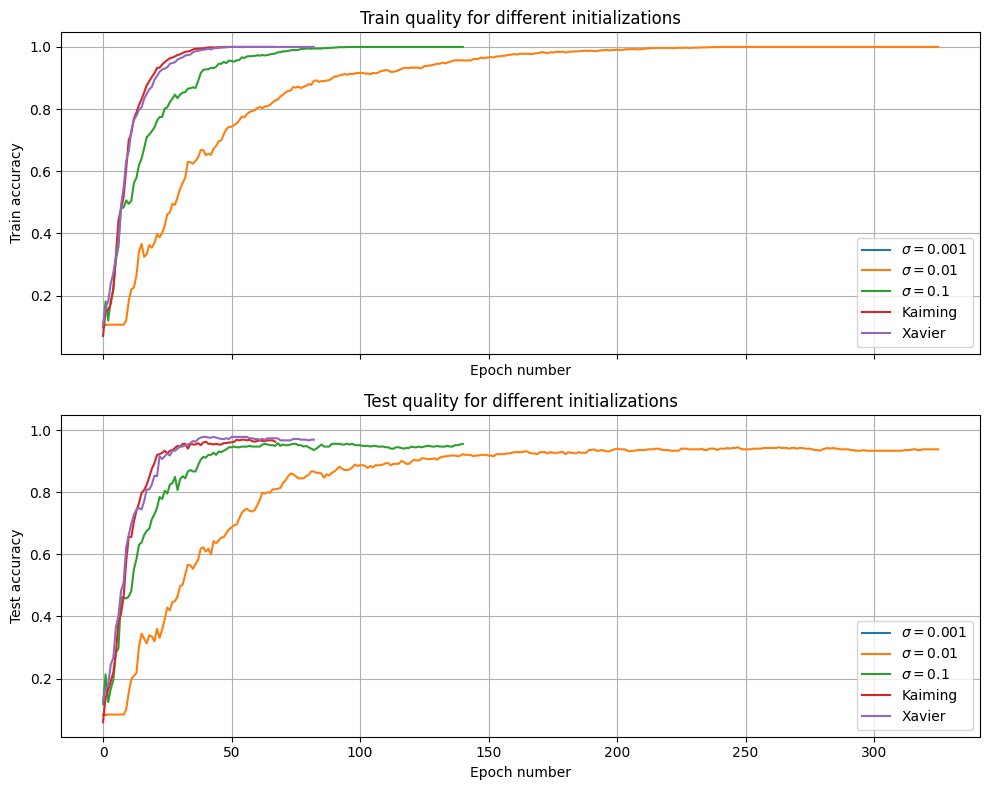

In [138]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

for idx, label in enumerate(init_vars_for_plot):
    ax[0].plot(accs_train_on_iterations[idx], label=label)
    ax[1].plot(accs_test_on_iterations[idx], label=label)

for idx, key in enumerate(["Train", "Test"]):
    ax[idx].set_title(f"{key} quality for different initializations")
    ax[idx].set_xlabel("Epoch number")
    ax[idx].set_ylabel(f"{key} accuracy")
    ax[idx].grid(True)
    ax[idx].legend()



fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость cходимости в зависимости от выбранной инициализации?

__Ответы:__

Наибольшая скорость сходимости у начальной иниализации Kaiming, затем идет инициализация Xavier. Чем меньше среднеквардратичное отклонение, тем дольше сеть сходится. При $\sigma = 0.001$ сеть не сошлась

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [139]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        ### your code here
        self.output = np.tanh(input) 
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        grad_input = grad_output * (1 - self.output ** 2)
        return grad_input, []  

    def __repr__(self):
        return 'Tanh()'

In [140]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        ### your code here
        self.output = expit(input)  
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        sigmoid_grad = self.output * (1 - self.output)  
        return grad_output * sigmoid_grad, [] 

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [141]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [142]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [144]:
### your code here
def get_accuracy_ini(X_train, X_test, y_train, y_test, initialization, activation_class):
    network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                           n_layers=3, activation_class=activation_class)
    
    initialize_network(network, initialization)
    weights = get_weights(network)

    res = minimize(
        compute_loss_grad, weights,       # fun and start point
        args=[network, X_train, y_train], # args passed to fun
        method="L-BFGS-B",                # optimization method
        jac=True                          # says that gradient is computed in fun
    )
    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy


n_runs = 5

for i in range(3):
    for j in range(n_runs):
        if i == 0:
            train_acc, test_acc = get_accuracy_ini(X_train, X_test, y_train, y_test, init_for_act_funcs[i], Tanh)
        elif i == 1:
            train_acc, test_acc = get_accuracy_ini(X_train, X_test, y_train, y_test, init_for_act_funcs[i], Sigmoid)
        else:
            train_acc, test_acc = get_accuracy_ini(X_train, X_test, y_train, y_test, init_for_act_funcs[i], ReLU)
        accs_train[i, j] = train_acc
        accs_test[i, j] = test_acc

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

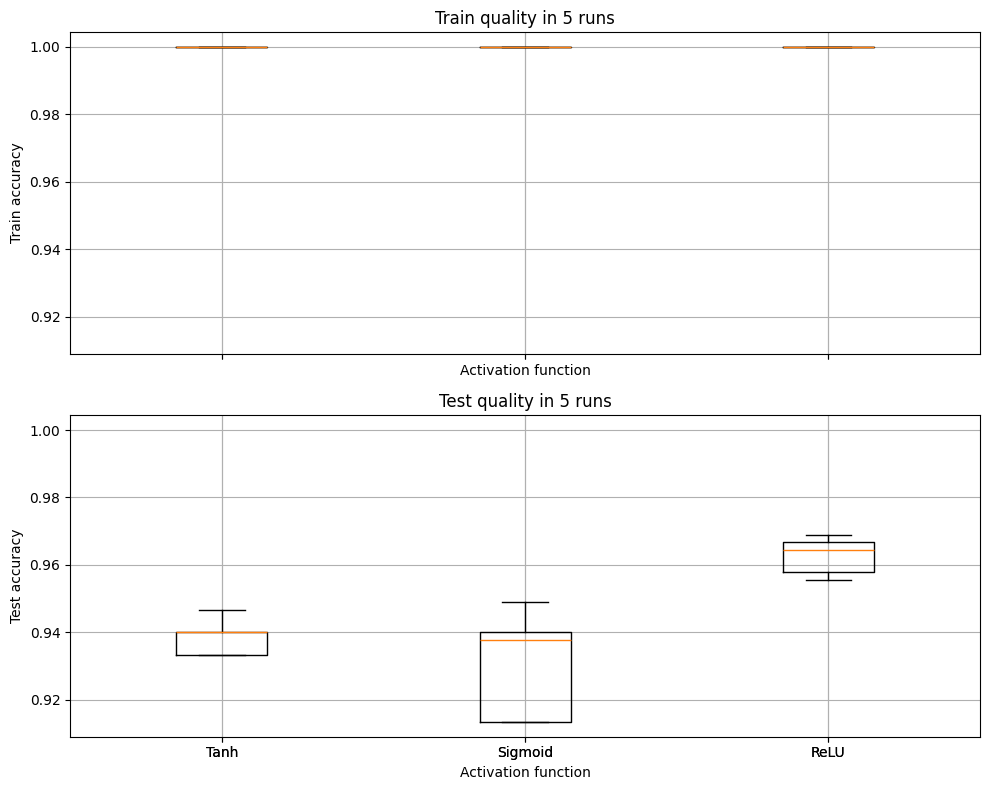

In [145]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

ax[0].boxplot(accs_train.T, labels=act_func_vars, showfliers=False)
ax[1].boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax[0].set_title("Train quality in 5 runs")
ax[1].set_title("Test quality in 5 runs")

ax[0].set_xlabel("Activation function")
ax[1].set_xlabel("Activation function")

ax[0].set_ylabel("Train accuracy")
ax[1].set_ylabel("Test accuracy")

ax[0].grid(True)
ax[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

Видим, что самые выскоие результаты показала ReLU. Sigmoid имеет худший результат: у него самая большая дисперсия. Tanh имеет небольшой разброс, однако его средняя точность ниже чем у ReLU. Скорее всего это связано с затуханием градиентов - моедль перестает нормально обучаться, и поэтому точность результатов ниже.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [160]:
from scipy.optimize import OptimizeResult


def SGD_momentum(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    x = np.array(x0, dtype=np.float64)  
    velocity = np.zeros_like(x)  

    for _ in range(n_iter):
        
        idx = np.random.choice(X.shape[0], batch_size, replace=False)
        X_batch, y_batch = X[idx], y[idx]

        loss, grad = fun(x, (net, X_batch, y_batch))
        
        velocity = mu * velocity - gamma * grad
        
        x += velocity
        if callback is not None:
            callback(x)

    return OptimizeResult(x=x, success=True)

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [162]:
# your code is here
network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=n_layer, activation_class=ReLU)

initialize_network(network, "Kaiming")
weights = get_weights(network)

cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = SGD_momentum(
    compute_loss_grad,               
    weights,                          
    args=[network, X_train, y_train],
    callback=cb.call,
    momentum=0.9,
    n_iter=300,
    lr=0.01,
    batch_size=32,
    jac=True
)

set_weights(res["x"], network)

y_pred_test = predict(network, X_test)
accuracy_test = np.mean(y_pred_test == y_test)
print(accuracy_test)

Train accuracy: 0.1032, Test accuracy: 0.1111
Train accuracy: 0.0780, Test accuracy: 0.0711
Train accuracy: 0.1633, Test accuracy: 0.1578
Train accuracy: 0.0958, Test accuracy: 0.1333
Train accuracy: 0.1106, Test accuracy: 0.1400
Train accuracy: 0.1463, Test accuracy: 0.1444
Train accuracy: 0.1923, Test accuracy: 0.1911
Train accuracy: 0.2346, Test accuracy: 0.2244
Train accuracy: 0.2584, Test accuracy: 0.2422
Train accuracy: 0.2643, Test accuracy: 0.2378
Train accuracy: 0.2680, Test accuracy: 0.2378
Train accuracy: 0.2895, Test accuracy: 0.2444
Train accuracy: 0.3170, Test accuracy: 0.2689
Train accuracy: 0.3192, Test accuracy: 0.2978
Train accuracy: 0.3422, Test accuracy: 0.3156
Train accuracy: 0.3519, Test accuracy: 0.3400
Train accuracy: 0.4039, Test accuracy: 0.3822
Train accuracy: 0.3853, Test accuracy: 0.3622
Train accuracy: 0.4039, Test accuracy: 0.3778
Train accuracy: 0.4180, Test accuracy: 0.3956
Train accuracy: 0.4217, Test accuracy: 0.4111
Train accuracy: 0.3808, Test accur

**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

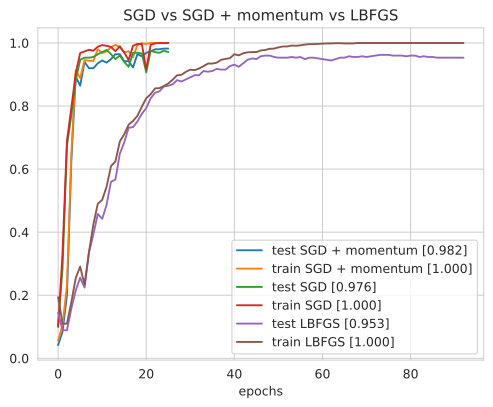

In [173]:
def SGD(fun, x0, args, lr, batch_size, n_iter=100, callback=None):

    weights = x0
    net, X, y = args
    n_samples = X.shape[0]

    for i in range(n_iter):
        indices = np.random.permutation(n_samples)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            X_batch, y_batch = X_shuffled[start:end], y_shuffled[start:end]

            loss, grad = fun(weights, [net, X_batch, y_batch])
            weights -= lr * grad
        
        if callback:
            callback(weights)

    return OptimizeResult(x=weights, success=True)

In [184]:
def train_with_LBFGSB(X_train, X_test, y_train, y_test, network, weights):
    callback = Callback(network, X_train, y_train, X_test, y_test)
    
    res = minimize(
        compute_loss_grad,              
        weights,                        
        args=[network, X_train, y_train],
        method="L-BFGS-B",               
        jac=True,
        callback=callback.call          
    )

    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy, callback.train_acc, callback.test_acc


def train_with_SGD_momentum(X_train, X_test, y_train, y_test, network, weights, lr, momentum, batch_size, n_iter=100, jac=True):
    callback = Callback(network, X_train, y_train, X_test, y_test)
    
    res = SGD_momentum(
        compute_loss_grad,               
        weights,                         
        args=[network, X_train, y_train],
        lr=lr,
        jac=jac,                           
        momentum=momentum,                
        batch_size=batch_size,            
        n_iter=n_iter,                    
        callback=callback.call           
    )

    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy, callback.train_acc, callback.test_acc


def train_with_SGD(X_train, X_test, y_train, y_test, network, weights, lr, batch_size, n_iter=100):
    callback = Callback(network, X_train, y_train, X_test, y_test)
    
    res = SGD(
        compute_loss_grad,               
        weights,                         
        args=[network, X_train, y_train],
        lr=lr,                           
        batch_size=batch_size,           
        n_iter=n_iter,                   
        callback=callback.call           
    )

    set_weights(res["x"], network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy, callback.train_acc, callback.test_acc

In [188]:
def hyperparameter_search(X_train, X_test, y_train, y_test, network, weights):
    lrs = np.logspace(-3, -1, 3)  
    momentums = [0, 0.9]          
    batch_sizes = [8, 32]         

    results = []
    method_histories = {
        'LBFGS-B': {'train': [], 'test': [], 'params': []},
        'SGD': {'train': [], 'test': [], 'params': []},
        'SGD + momentum': {'train': [], 'test': [], 'params': []}
    }

    for lr in lrs:
        for momentum in momentums:
            for batch_size in batch_sizes:

                network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=3, activation_class=ReLU)
                initialize_network(network, "Kaiming")
                weights = get_weights(network)

                # LBFGS-B
                train_acc, test_acc, train_acc_history, test_acc_history = train_with_LBFGSB(X_train, X_test, y_train, y_test, network, weights)
                results.append(('LBFGS-B', lr, momentum, batch_size, train_acc, test_acc))
                method_histories['LBFGS-B']['train'].append(train_acc_history)
                method_histories['LBFGS-B']['test'].append(test_acc_history)
                method_histories['LBFGS-B']['params'].append(f"LR: {lr}, Momentum: {momentum}, Batch: {batch_size}")

                # SGD
                network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=3, activation_class=ReLU)
                initialize_network(network, "Kaiming")
                weights = get_weights(network)

                train_acc, test_acc, train_acc_history, test_acc_history = train_with_SGD(X_train, X_test, y_train, y_test, network, weights, lr, batch_size)
                results.append(('SGD', lr, momentum, batch_size, train_acc, test_acc))
                method_histories['SGD']['train'].append(train_acc_history)
                method_histories['SGD']['test'].append(test_acc_history)
                method_histories['SGD']['params'].append(f"LR: {lr}, Momentum: {momentum}, Batch: {batch_size}")

                # SGD + momentum
                network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
                        n_layers=3, activation_class=ReLU)
                initialize_network(network, "Kaiming")
                weights = get_weights(network)
                
                train_acc, test_acc, train_acc_history, test_acc_history = train_with_SGD_momentum(X_train, X_test, y_train, y_test, network, weights, lr=lr, momentum=momentum, batch_size=batch_size)
                results.append(('SGD + momentum', lr, momentum, batch_size, train_acc, test_acc))
                method_histories['SGD + momentum']['train'].append(train_acc_history)
                method_histories['SGD + momentum']['test'].append(test_acc_history)
                method_histories['SGD + momentum']['params'].append(f"LR: {lr}, Momentum: {momentum}, Batch: {batch_size}")

    # Построение графиков
    plot_learning_curves(method_histories)
    return results

def plot_learning_curves(method_histories):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 строка, 3 столбца для каждого метода
    fig.suptitle('Learning Curves for Different Methods and Hyperparameters')

    for idx, (method, data) in enumerate(method_histories.items()):
        ax = axes[idx]
        for i, (train_history, test_history, params) in enumerate(zip(data['train'], data['test'], data['params'])):
            ax.plot(train_history, label=f'Train {params}')
            ax.plot(test_history, label=f'Test {params}', linestyle='--')
        ax.set_title(method)
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy')
        ax.legend(loc='lower right', fontsize='small')
    
    plt.tight_layout()
    plt.show()

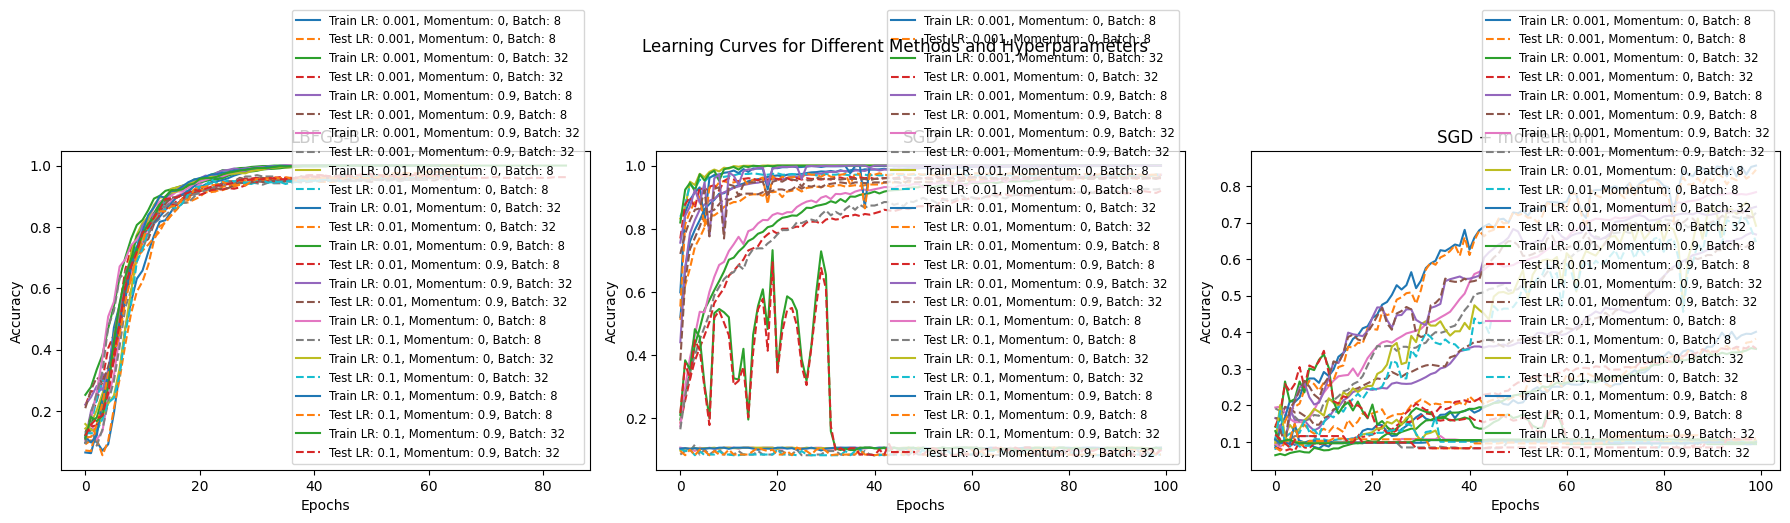

Best result for LBFGS-B:
LR: 0.01, Momentum: 0, Batch size: 32
Train accuracy: 1.0, Test accuracy: 0.9755555555555555
Best result for SGD:
LR: 0.01, Momentum: 0, Batch size: 8
Train accuracy: 1.0, Test accuracy: 0.9711111111111111
Best result for SGD + momentum:
LR: 0.01, Momentum: 0, Batch size: 32
Train accuracy: 0.8559762435040832, Test accuracy: 0.8444444444444444


In [189]:
results = hyperparameter_search(X_train, X_test, y_train, y_test, network, weights)
results_np = np.array(results, dtype=object)

best_results = {}

for method in ['LBFGS-B', 'SGD', 'SGD + momentum']:
    best_result = results_np[results_np[:, 0] == method]
    best_result = best_result[best_result[:, 5].astype(float).argmax()]
    best_results[method] = best_result

for method, best_result in best_results.items():
    print(f"Best result for {method}:")
    print(f"LR: {best_result[1]}, Momentum: {best_result[2]}, Batch size: {best_result[3]}")
    print(f"Train accuracy: {best_result[4]}, Test accuracy: {best_result[5]}")


**Выводы:** Простите, графики получились не очень, сил исправлять нет :( 

    {1 график - LBFGS-B:, 2 график - SGD, 3 график - SGD + momentum}

    Мы видим, что LBFGS-B довольно стабильный метод, и с различными параметрами он сходится всегда. SGD при больших lr начинает расходится. С SGD + momentum ситуация аналогичная.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

In [199]:
def adam_optimizer(compute_loss_grad, weights, network, X_train, y_train, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iter=100, callback=None):
    m = np.zeros_like(weights)
    v = np.zeros_like(weights)
    t = 0
    for i in range(n_iter):
        t += 1
        args = (network, X_train, y_train)
        grads = compute_loss_grad(weights, args)

        grads = np.array(grads)

        m = beta1 * m + (1 - beta1) * grads
        v = beta2 * v + (1 - beta2) * (grads ** 2)
        
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        
        weights = weights - lr * m_hat / (np.sqrt(v_hat) + epsilon)

        if callback:
            callback(weights)

    return weights

In [200]:
def train_with_adam(X_train, X_test, y_train, y_test, network, weights, lr, batch_size, n_iter=100):
    callback = Callback(network, X_train, y_train, X_test, y_test)
    weights = adam_optimizer(
        compute_loss_grad,               
        weights,                         
        network, X_train, y_train,
        lr=lr,                           
        n_iter=n_iter,                   
        callback=callback.call           
    )

    set_weights(weights, network)
    train_preds = predict(network, X_train)
    test_preds = predict(network, X_test)
    
    train_accuracy = np.mean(train_preds == y_train)
    test_accuracy = np.mean(test_preds == y_test)

    return train_accuracy, test_accuracy, callback.train_acc, callback.test_acc

In [202]:
# def hyperparameter_search_with_adam(X_train, X_test, y_train, y_test, network, weights):
#     lrs = np.logspace(-3, -1, 2)  
#     momentums = [0, 0.9]          
#     batch_sizes = [8, 32]         

#     results = []
#     method_histories = {
#         'LBFGS-B': {'train': [], 'test': [], 'params': []},
#         'SGD': {'train': [], 'test': [], 'params': []},
#         'SGD + momentum': {'train': [], 'test': [], 'params': []},
#         'Adam': {'train': [], 'test': [], 'params': []}
#     }

#     for lr in lrs:
#         for momentum in momentums:
#             for batch_size in batch_sizes:
#                 # SGD + momentum
#                 network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
#                         n_layers=3, activation_class=ReLU)
#                 initialize_network(network, "Kaiming")
#                 weights = get_weights(network)
                
#                 train_acc, test_acc, train_acc_history, test_acc_history = train_with_SGD_momentum(X_train, X_test, y_train, y_test, network, weights, lr=lr, momentum=momentum, batch_size=batch_size)
#                 results.append(('SGD + momentum', lr, momentum, batch_size, train_acc, test_acc))
#                 method_histories['SGD + momentum']['train'].append(train_acc_history)
#                 method_histories['SGD + momentum']['test'].append(test_acc_history)
#                 method_histories['SGD + momentum']['params'].append(f"LR: {lr}, Momentum: {momentum}, Batch: {batch_size}")

#                 # Adam
#                 network = make_network(X_train.shape[1], hidden_layers_size=32, output_size=10, 
#                         n_layers=3, activation_class=ReLU)
#                 initialize_network(network, "Kaiming")
#                 weights = get_weights(network)

#                 train_acc, test_acc, train_acc_history, test_acc_history = train_with_adam(X_train, X_test, y_train, y_test, network, weights, lr=lr, batch_size=batch_size)
#                 results.append(('Adam', lr, momentum, batch_size, train_acc, test_acc))
#                 method_histories['Adam']['train'].append(train_acc_history)
#                 method_histories['Adam']['test'].append(test_acc_history)
#                 method_histories['Adam']['params'].append(f"LR: {lr}, Momentum: {momentum}, Batch: {batch_size}")

#     plot_learning_curves(method_histories)
#     return results

# def plot_learning_curves(method_histories):
#     fig, axes = plt.subplots(2, 2, figsize=(18, 12)) 
#     fig.suptitle('Learning Curves for Different Methods and Hyperparameters')

#     methods = list(method_histories.keys())
#     for idx, method in enumerate(methods):
#         ax = axes[idx // 2, idx % 2]
#         data = method_histories[method]
#         for i, (train_history, test_history, params) in enumerate(zip(data['train'], data['test'], data['params'])):
#             ax.plot(train_history, label=f'Train {params}')
#             ax.plot(test_history, label=f'Test {params}', linestyle='--')
#         ax.set_title(method)
#         ax.set_xlabel('Epochs')
#         ax.set_ylabel('Accuracy')
#         ax.legend(loc='lower right', fontsize='small')
    
#     plt.tight_layout()
#     plt.show()

# results = hyperparameter_search_with_adam(X_train, X_test, y_train, y_test, network, weights)
# results_np = np.array(results, dtype=object)

# best_results = {}


### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [203]:
class Dropout:
    def __init__(self, p: float):
        self.p = p
        self.mask = None

    def forward(self, input_data):
        """Прямой проход через слой Dropout"""
        if self.p == 0:
            return input_data
        self.mask = np.random.binomial(1, 1 - self.p, size=input_data.shape)
        return input_data * self.mask

    def backward(self, grad_output):
        """Обратный проход через слой Dropout"""
        return grad_output * self.mask


### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.

In [204]:
class BatchNormalization:
    def __init__(self, input_size, momentum=0.9, epsilon=1e-5):
        self.input_size = input_size
        self.momentum = momentum
        self.epsilon = epsilon
        
        # обучаемые параметры
        self.gamma = np.ones((1, input_size))  # масштабирование
        self.beta = np.zeros((1, input_size))  # сдвиг
        
        self.running_mean = np.zeros((1, input_size))
        self.running_var = np.ones((1, input_size))
        
        self.batch_mean = None
        self.batch_var = None
        self.x_normalized = None

    def forward(self, X, training=True):
        if training:
            self.batch_mean = np.mean(X, axis=0, keepdims=True)
            self.batch_var = np.var(X, axis=0, keepdims=True)
            
            self.x_normalized = (X - self.batch_mean) / np.sqrt(self.batch_var + self.epsilon)
            
            self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * self.batch_mean
            self.running_var = self.momentum * self.running_var + (1 - self.momentum) * self.batch_var
            
            out = self.gamma * self.x_normalized + self.beta
        else:
            x_normalized = (X - self.running_mean) / np.sqrt(self.running_var + self.epsilon)
            out = self.gamma * x_normalized + self.beta
        
        return out

    def backward(self, grad_output):
        m = grad_output.shape[0]
        
        grad_gamma = np.sum(grad_output * self.x_normalized, axis=0)
        grad_beta = np.sum(grad_output, axis=0)
        
        grad_x_normalized = grad_output * self.gamma
        
        grad_var = np.sum(grad_x_normalized * (self.x_normalized * -0.5) * np.power(self.batch_var + self.epsilon, -1.5), axis=0)
        grad_mean = np.sum(grad_x_normalized * -1 / np.sqrt(self.batch_var + self.epsilon), axis=0) + grad_var * np.mean(-2 * (self.x_normalized), axis=0)
        
        grad_input = grad_x_normalized / np.sqrt(self.batch_var + self.epsilon) + grad_var * 2 * self.x_normalized / m + grad_mean / m
        
        return grad_input, grad_gamma, grad_beta
